# Análisis Visual del Dataset Superstore 2012

## Exploración de Ventas, Beneficios y Patrones de Negocio

### 1. Configuración e Importación de Librerías

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configuración global
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

### 2. Carga de datos

In [9]:
try:
    df = pd.read_csv('/workspace/superstore_dataset2012.csv')
    print("✅ Dataset cargado exitosamente")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo en /workspace")

# Exploración de datos
print("\n=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nTipos de datos y valores no nulos:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

# Verificación de valores nulos
print("\n=== VERIFICACIÓN DE VALORES NULOS ===")
null_counts = df.isnull().sum()
display(null_counts[null_counts > 0])

✅ Dataset cargado exitosamente

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones: 4246 filas x 24 columnas

Primeras 5 filas:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,21896,ID-2012-71858,1/2/2012,7/2/2012,Standard Class,CP-12085,Cathy Prescott,Corporate,Jakarta,Jakarta,...,TEC-PH-10003784,Technology,Phones,"Motorola Signal Booster, with Caller ID",593.9895,5,0.17,-71.7105,52.22,Medium
1,4323,MX-2012-154459,1/2/2012,6/2/2012,Standard Class,JF-15190,Jamie Frazer,Consumer,Santiago,Santiago,...,TEC-PH-10002102,Technology,Phones,"Nokia Headset, Cordless",151.9200,3,0.00,71.4000,32.94,High
2,2829,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,TEC-AC-10002760,Technology,Accessories,"Memorex Memory Card, Erganomic",200.1600,3,0.00,0.0000,28.95,High
3,2828,MX-2012-114461,1/2/2012,5/2/2012,Standard Class,RM-19375,Raymond Messe,Consumer,Escuintla,Escuintla,...,FUR-CH-10001423,Furniture,Chairs,"Harbour Creations Rocking Chair, Black",192.8800,2,0.00,54.0000,19.27,High
4,6762,MX-2012-151904,1/2/2012,3/2/2012,First Class,DJ-13420,Denny Joy,Corporate,Villa Canales,Guatemala,...,OFF-PA-10003571,Office Supplies,Paper,"Enermax Cards & Envelopes, Recycled",94.0200,3,0.00,1.8600,10.73,Medium



Tipos de datos y valores no nulos:
<class 'pandas.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          4246 non-null   int64  
 1   Order ID        4246 non-null   str    
 2   Order Date      4246 non-null   str    
 3   Ship Date       4246 non-null   str    
 4   Ship Mode       4246 non-null   str    
 5   Customer ID     4246 non-null   str    
 6   Customer Name   4246 non-null   str    
 7   Segment         4246 non-null   str    
 8   City            4246 non-null   str    
 9   State           4246 non-null   str    
 10  Country         4246 non-null   str    
 11  Postal Code     823 non-null    float64
 12  Market          4246 non-null   str    
 13  Region          4246 non-null   str    
 14  Product ID      4246 non-null   str    
 15  Category        4246 non-null   str    
 16  Sub-Category    4246 non-null   str    
 17  Product 

None


Estadísticas descriptivas:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,4246.000000,823.000000,4246.000000,4246.000000,4246.000000,4246.000000,4246.000000
mean,25248.240226,48442.910085,237.029481,3.444183,0.146615,27.698282,24.539708
std,14711.393243,32118.342697,426.974969,2.228431,0.216120,147.459878,50.422150
min,66.000000,1040.000000,1.112000,1.000000,0.000000,-1806.240000,0.030000
25%,12424.250000,19140.000000,30.564000,2.000000,0.000000,-0.062700,2.610000
50%,24848.000000,44256.000000,82.527900,3.000000,0.000000,9.029400,7.600000
75%,37522.750000,78207.000000,245.814750,5.000000,0.200000,35.902500,23.530000
max,51289.000000,99207.000000,5759.964000,14.000000,0.800000,2229.024000,759.470000



=== VERIFICACIÓN DE VALORES NULOS ===


Postal Code    3423
dtype: int64

### 3. Preparación y Limpieza de Datos

In [10]:
# Transformación de datos
date_columns = ['Order Date', 'Ship Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)
        print(f"✅ {col} convertido a datetime")

# Columnas para análisis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

print("\n=== NUEVAS COLUMNAS CREADAS ===")
print(f"Período: {df['Year'].min()} - {df['Year'].max()}")
print(f"Margen de beneficio promedio: {df['Profit_Margin'].mean():.2f}%")

✅ Order Date convertido a datetime
✅ Ship Date convertido a datetime

=== NUEVAS COLUMNAS CREADAS ===
Período: 2012 - 2012
Margen de beneficio promedio: 3.83%


### 4. Visualización Univariante con Matplotlib

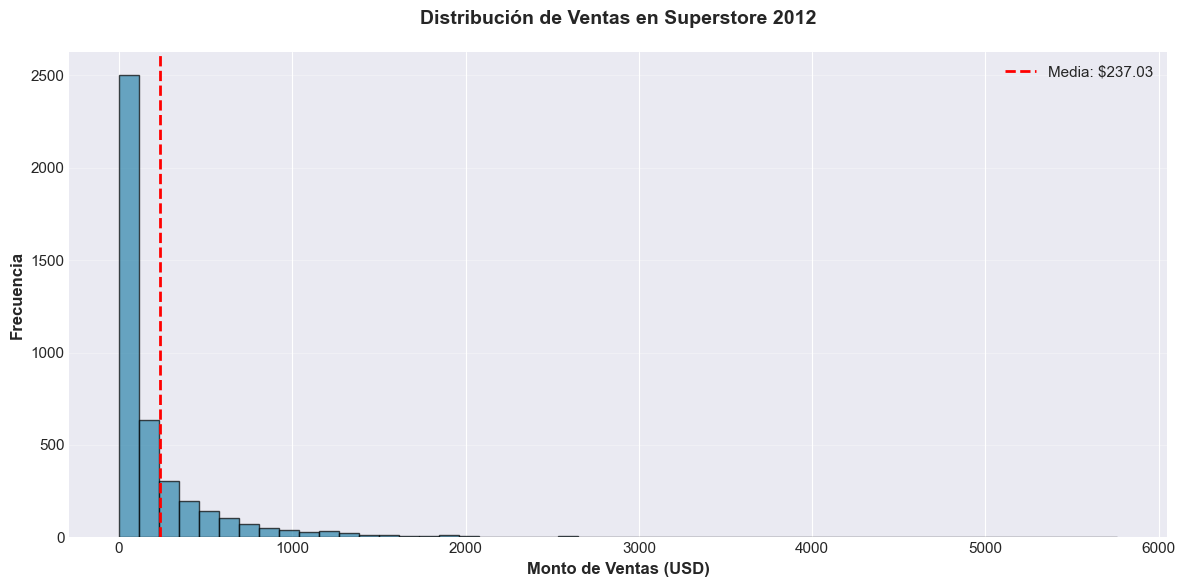

In [11]:
# Histograma de Ventas
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['Sales'], bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
ax.set_title('Distribución de Ventas en Superstore 2012', fontweight='bold', pad=20)
ax.set_xlabel('Monto de Ventas (USD)', fontweight='bold')
ax.set_ylabel('Frecuencia', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Añadir línea de media
mean_sales = df['Sales'].mean()
ax.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Media: ${mean_sales:,.2f}')
ax.legend()

plt.tight_layout()
plt.show()

### 5. Visualización Univariante con Seaborn

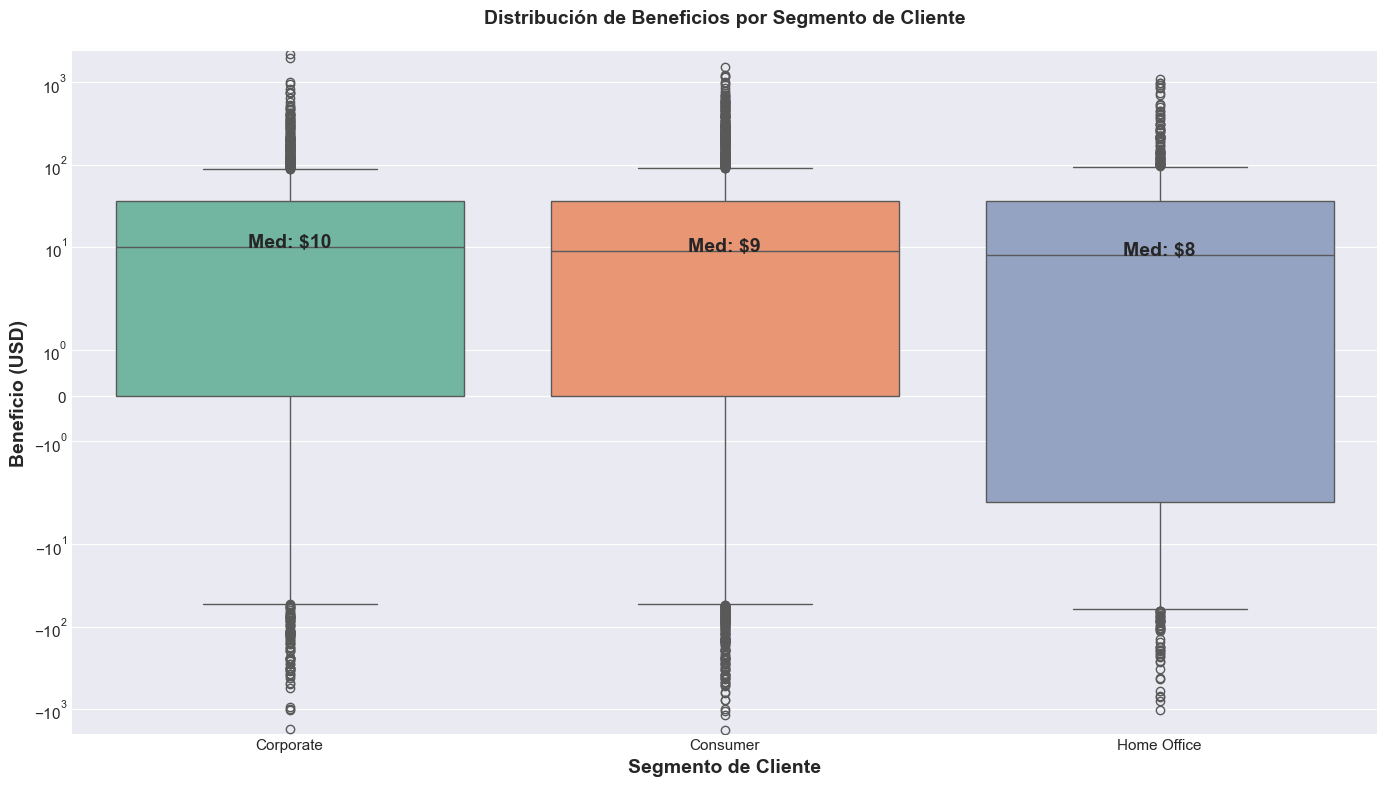

In [12]:
plt.figure(figsize=(14, 8))
boxplot = sns.boxplot(
    data=df,
    x='Segment',
    y='Profit',
    hue='Segment',
    palette='Set2',
    legend=False
)

plt.title('Distribución de Beneficios por Segmento de Cliente', fontweight='bold', pad=20)
plt.xlabel('Segmento de Cliente', fontweight='bold', fontsize=14,)
plt.ylabel('Beneficio (USD)', fontweight='bold', fontsize=14,)
plt.yscale('symlog')

# Añadir estadísticas
for i, segment in enumerate(df['Segment'].unique()):
    segment_data = df[df['Segment'] == segment]['Profit']
    median = segment_data.median()
    plt.text(i, median, f'Med: ${median:,.0f}', 
             horizontalalignment='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 6. Gráfico Bivariante con Matplotlib

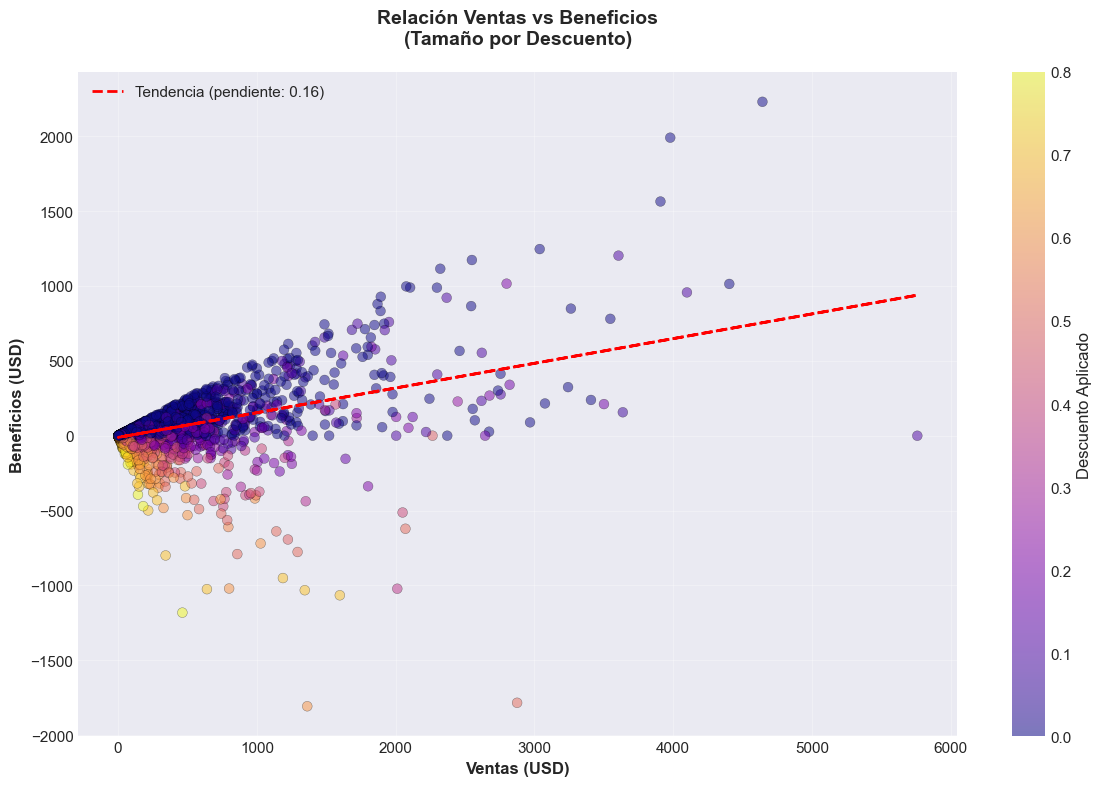

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    df['Sales'], 
    df['Profit'], 
    alpha=0.5, 
    c=df['Discount'], 
    cmap='plasma', 
    s=50,
    edgecolors='black',
    linewidth=0.3
)

# Línea de tendencia
z = np.polyfit(df['Sales'], df['Profit'], 1)
p = np.poly1d(z)
ax.plot(df['Sales'], p(df['Sales']), "r--", linewidth=2, label=f'Tendencia (pendiente: {z[0]:.2f})')

plt.colorbar(scatter, label='Descuento Aplicado')
ax.set_title('Relación Ventas vs Beneficios\n(Tamaño por Descuento)', fontweight='bold', pad=20)
ax.set_xlabel('Ventas (USD)', fontweight='bold')
ax.set_ylabel('Beneficios (USD)', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7. Gráfico Bivariante con Seaborn

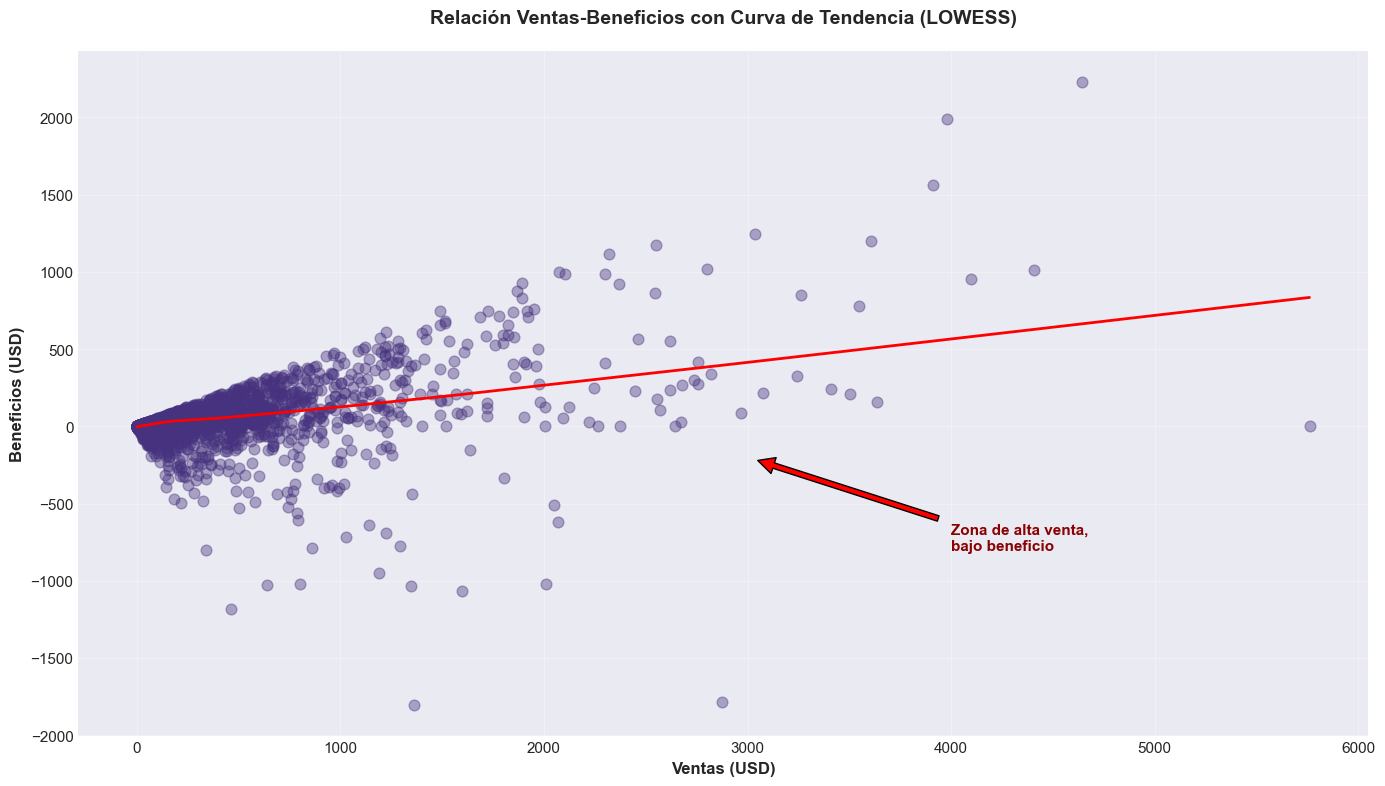

In [14]:
plt.figure(figsize=(14, 8))
sns.regplot(
    data=df,
    x='Sales',
    y='Profit',
    scatter=True,
    lowess=True,
    scatter_kws={'alpha': 0.4, 's': 60},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Relación Ventas-Beneficios con Curva de Tendencia (LOWESS)', fontweight='bold', pad=20)
plt.xlabel('Ventas (USD)', fontweight='bold')
plt.ylabel('Beneficios (USD)', fontweight='bold')
plt.grid(True, alpha=0.3)

# Añadir anotaciones para insights
plt.annotate('Zona de alta venta,\nbajo beneficio', 
             xy=(3000, -200), xytext=(4000, -800),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=11, fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()


### 8. Visualización Multivariante con Seaborn

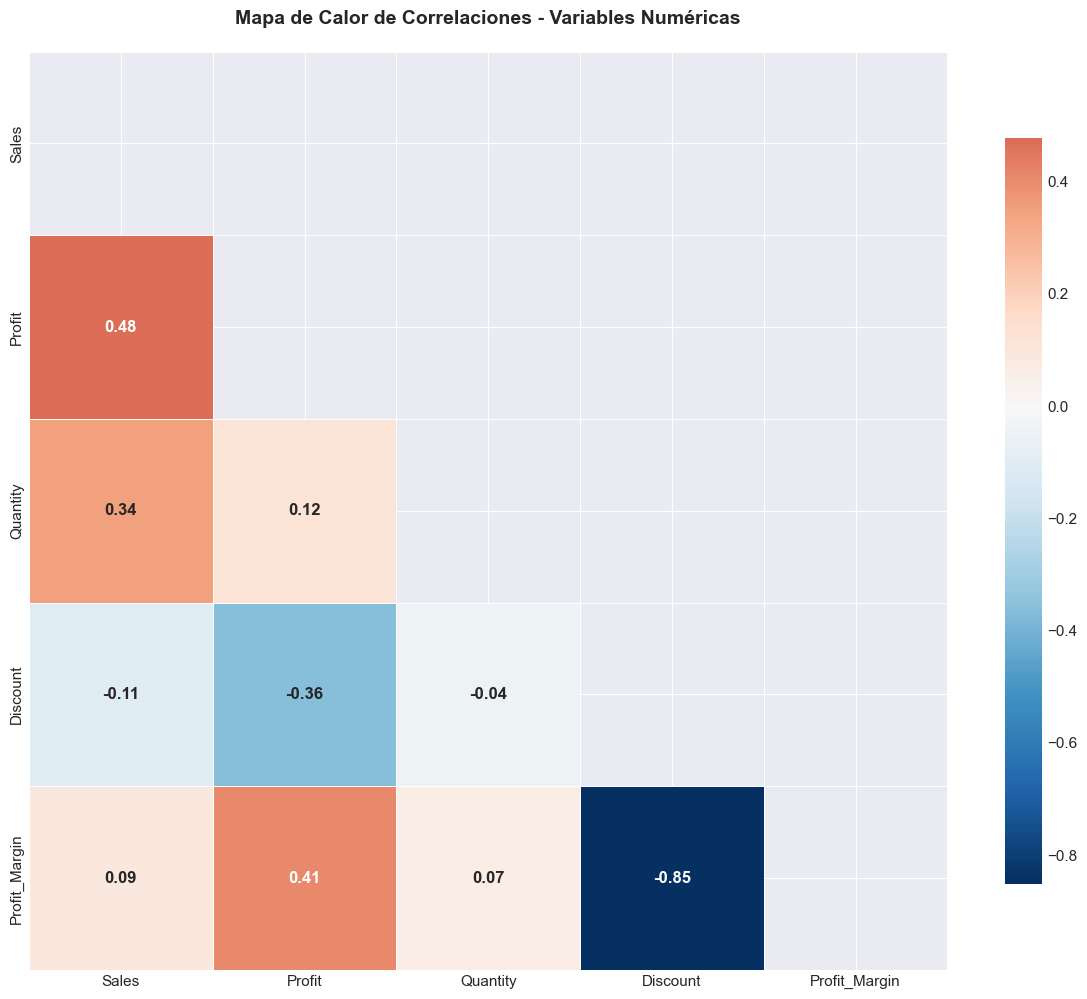

In [16]:
plt.figure(figsize=(12, 10))

# Selección de variables numéricas
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Profit_Margin']
correlation_matrix = df[numeric_cols].corr()

# Crear máscara para triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    fmt='.2f',
    annot_kws={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('Mapa de Calor de Correlaciones - Variables Numéricas', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


### 9. Visualización Multivariante Adicional - Pairplot

<Figure size 1600x1200 with 0 Axes>

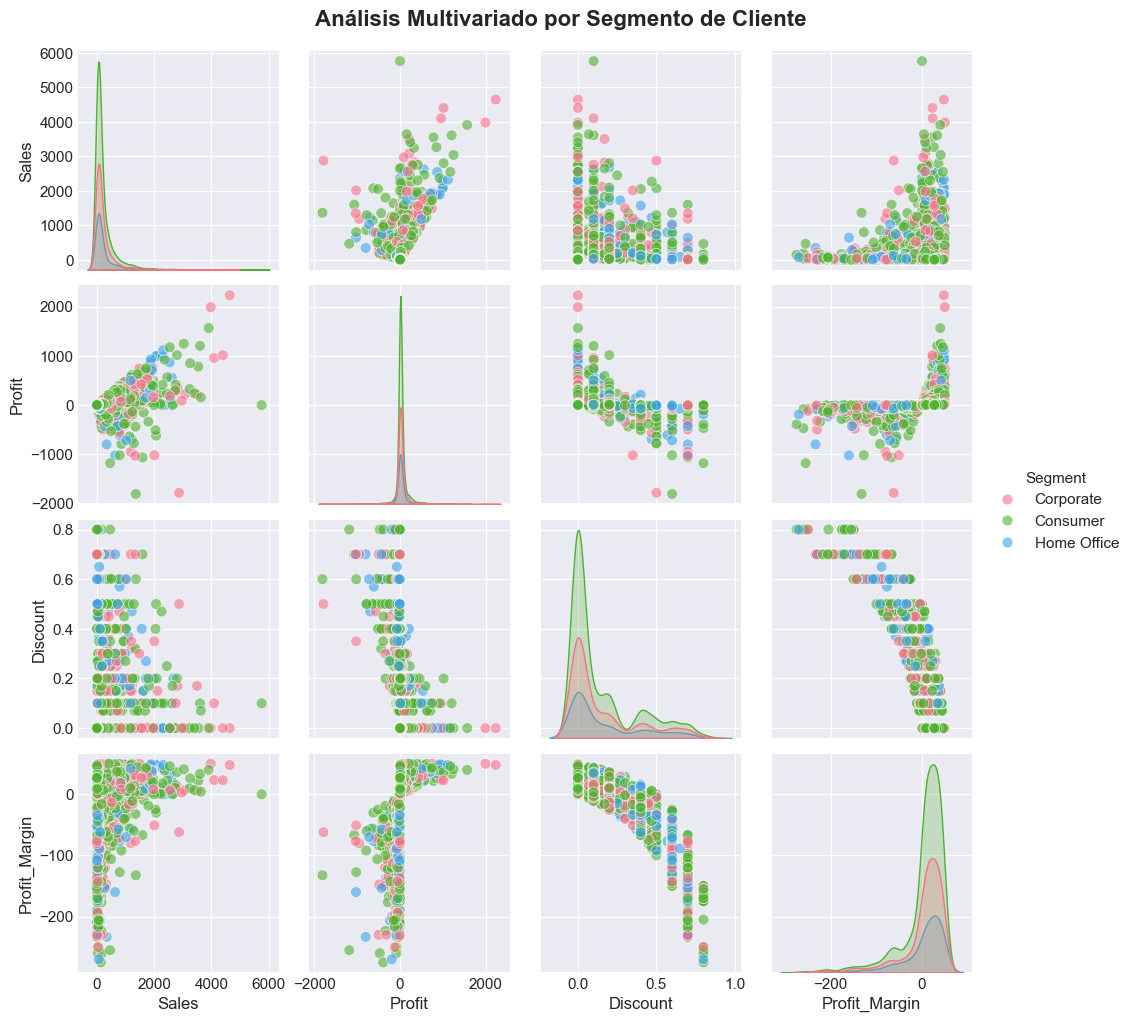

In [17]:
plt.figure(figsize=(16, 12))
pairplot = sns.pairplot(
    df,
    vars=['Sales', 'Profit', 'Discount', 'Profit_Margin'],
    hue='Segment',
    palette='husl',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 60},
    height=2.5
)

pairplot.fig.suptitle('Análisis Multivariado por Segmento de Cliente', y=1.02, fontweight='bold', fontsize=16)
plt.show()

### 10. Dashboard con Subplots

/var/folders/l2/735lg3jx62bddf8dw0z37x3r0000gn/T/ipykernel_12200/1924506126.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Discount', ax=ax4, palette='Set3')


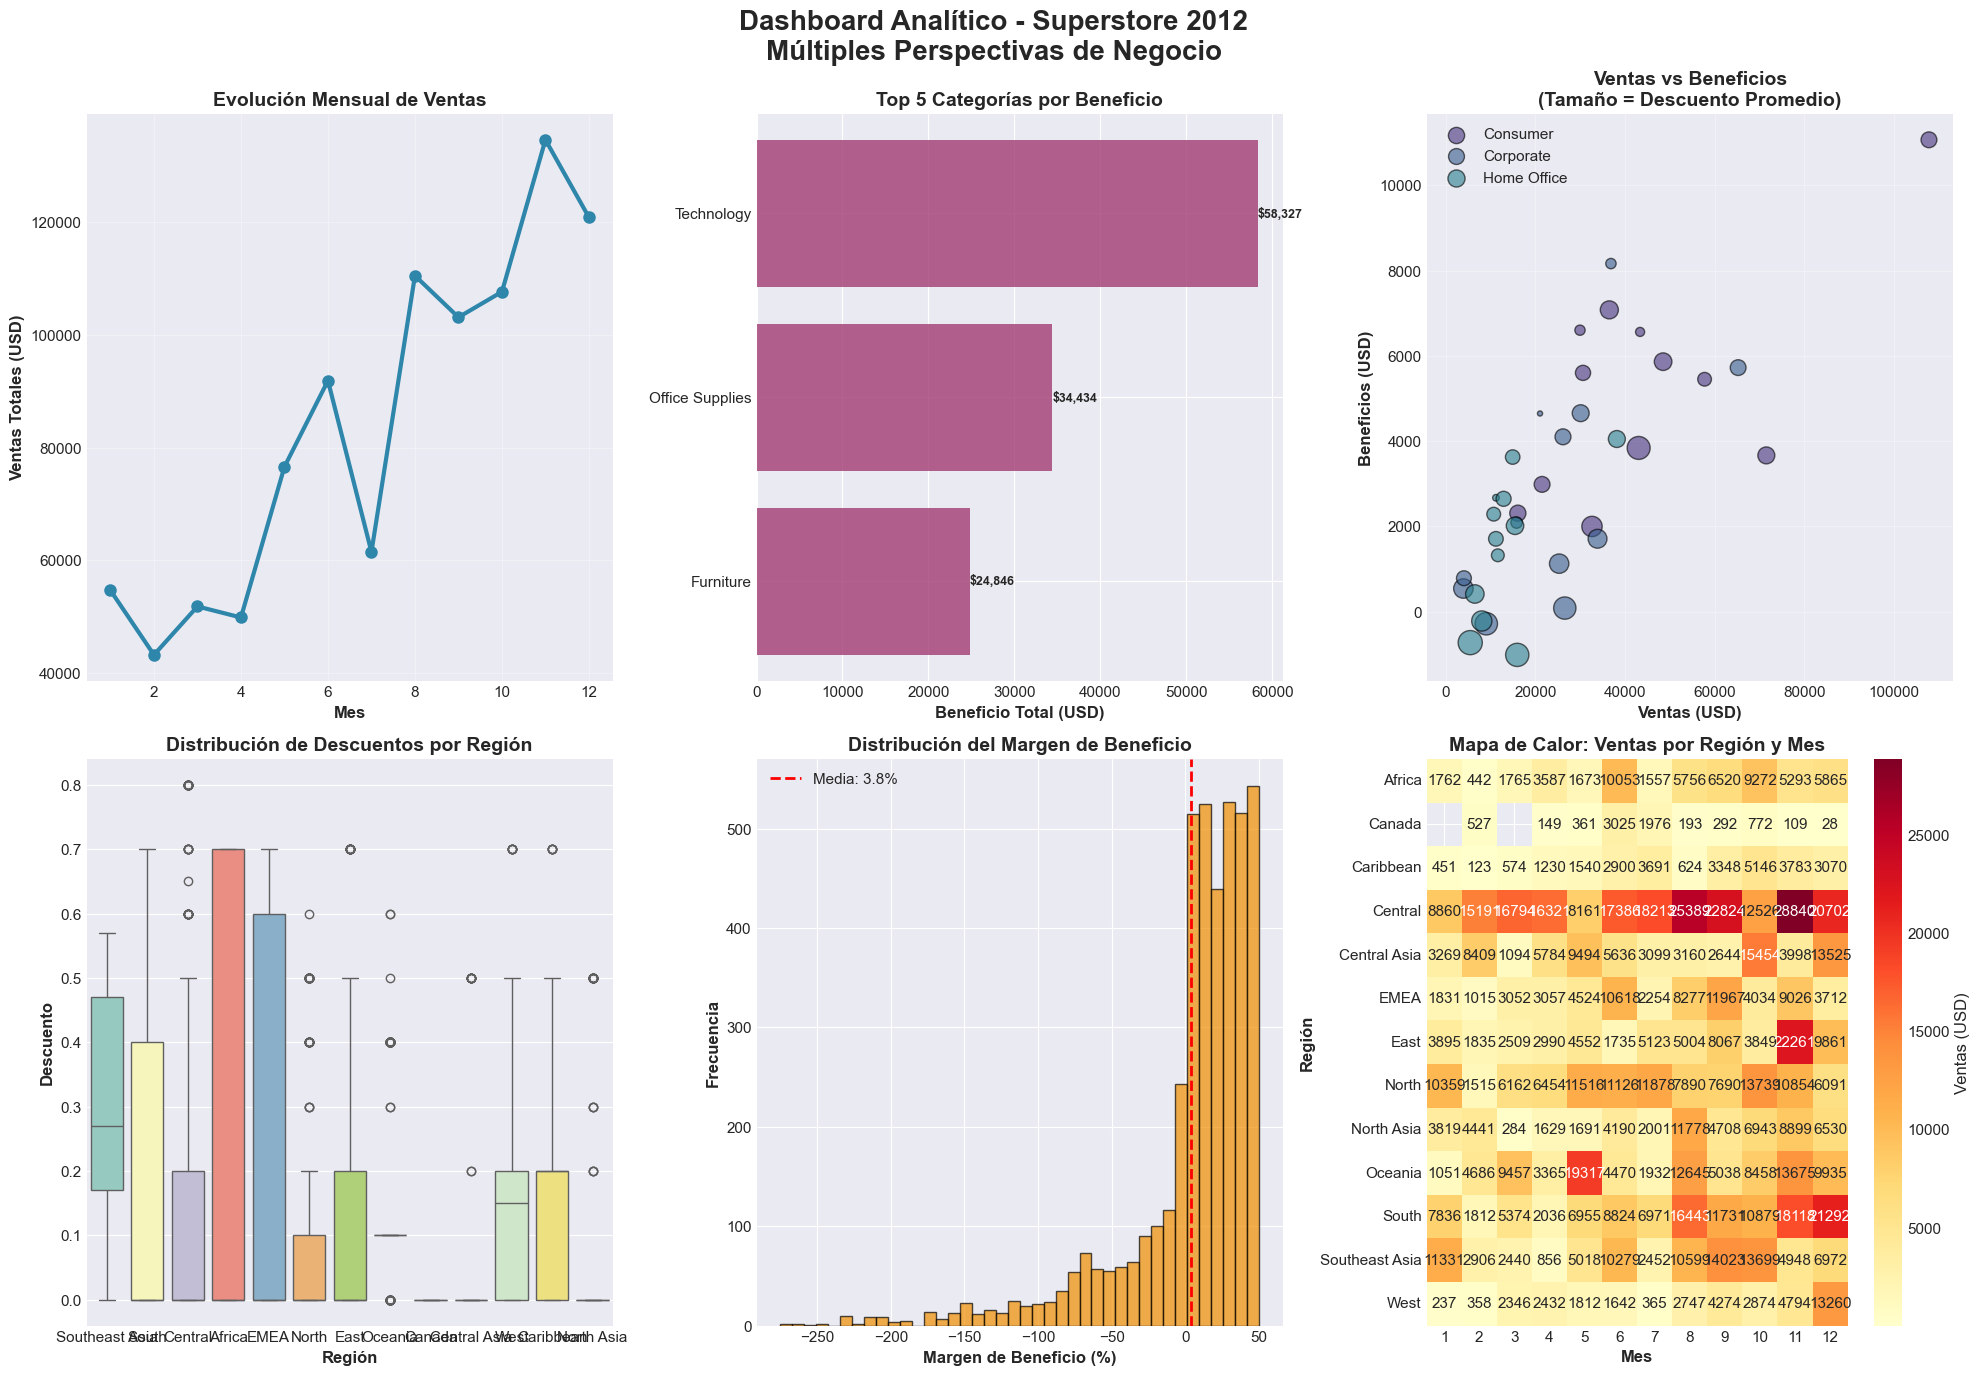

In [25]:
fig = plt.figure(figsize=(20, 14))
fig.suptitle('Dashboard Analítico - Superstore 2012\nMúltiples Perspectivas de Negocio', 
             fontsize=20, fontweight='bold', y=0.98)

# Subplot 1: Ventas por Mes (línea)
ax1 = plt.subplot(2, 3, 1)
monthly_sales = df.groupby('Month')['Sales'].sum()
ax1.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=3, color='#2E86AB', markersize=8)
ax1.set_title('Evolución Mensual de Ventas', fontweight='bold')
ax1.set_xlabel('Mes', fontweight='bold')
ax1.set_ylabel('Ventas Totales (USD)', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Subplot 2: Top 5 Categorías por Beneficio (barras horizontales)
ax2 = plt.subplot(2, 3, 2)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=True).head(5)
bars = ax2.barh(category_profit.index, category_profit.values, color='#A23B72', alpha=0.8)
ax2.set_title('Top 5 Categorías por Beneficio', fontweight='bold')
ax2.set_xlabel('Beneficio Total (USD)', fontweight='bold')
# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'${width:,.0f}', 
             ha='left', va='center', fontweight='bold', fontsize=9)

# Subplot 3: Dispersión Segmento-Región (bubble chart)
ax3 = plt.subplot(2, 3, 3)
segment_region = df.groupby(['Segment', 'Region']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
}).reset_index()

# Crear scatter con tamaño basado en descuento
for segment in segment_region['Segment'].unique():
    data = segment_region[segment_region['Segment'] == segment]
    ax3.scatter(data['Sales'], data['Profit'], 
               s=data['Discount']*1000,  # Tamaño proporcional a descuento
               label=segment, alpha=0.6, edgecolors='black')

ax3.set_title('Ventas vs Beneficios\n(Tamaño = Descuento Promedio)', fontweight='bold')
ax3.set_xlabel('Ventas (USD)', fontweight='bold')
ax3.set_ylabel('Beneficios (USD)', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Subplot 4: Boxplot Descuentos por Región
ax4 = plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Region', y='Discount', ax=ax4, palette='Set3')
ax4.set_title('Distribución de Descuentos por Región', fontweight='bold')
ax4.set_xlabel('Región', fontweight='bold')
ax4.set_ylabel('Descuento', fontweight='bold')

# Subplot 5: Histograma de Margen de Beneficio
ax5 = plt.subplot(2, 3, 5)
ax5.hist(df['Profit_Margin'], bins=40, color='#F18F01', alpha=0.7, edgecolor='black')
ax5.axvline(df['Profit_Margin'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {df["Profit_Margin"].mean():.1f}%')
ax5.set_title('Distribución del Margen de Beneficio', fontweight='bold')
ax5.set_xlabel('Margen de Beneficio (%)', fontweight='bold')
ax5.set_ylabel('Frecuencia', fontweight='bold')
ax5.legend()

# Subplot 6: Heatmap Ventas por Mes y Región
ax6 = plt.subplot(2, 3, 6)
pivot_data = df.pivot_table(values='Sales', index='Region', columns='Month', aggfunc='sum')
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax6, 
            cbar_kws={'label': 'Ventas (USD)'})
ax6.set_title('Mapa de Calor: Ventas por Región y Mes', fontweight='bold')
ax6.set_xlabel('Mes', fontweight='bold')
ax6.set_ylabel('Región', fontweight='bold')

plt.tight_layout()
plt.show()


### 11. Guardar Figura como Archivo

✅ Dashboard guardado en /workspace/dashboard_superstore_2012.png
✅ Heatmap guardado en /workspace/correlaciones_superstore.png


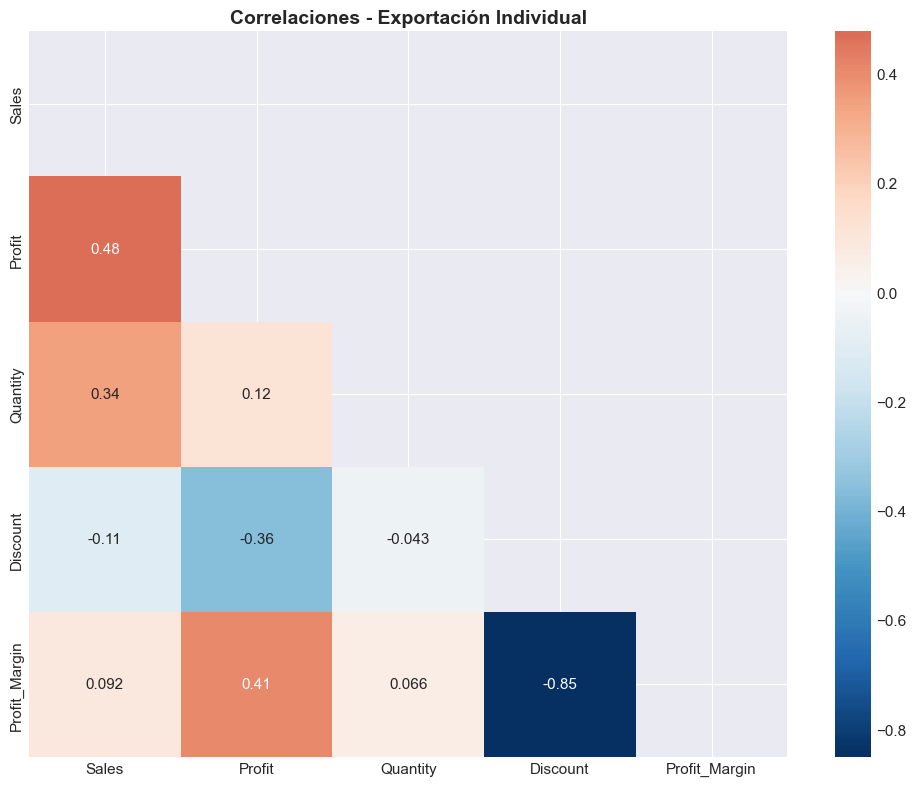

In [28]:
fig.savefig('/workspace/dashboard_superstore_2012.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
print("✅ Dashboard guardado en /workspace/dashboard_superstore_2012.png")

# Guardar también el heatmap de correlación individualmente
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlaciones - Exportación Individual', fontweight='bold')
plt.tight_layout()
plt.savefig('/workspace/correlaciones_superstore.png', dpi=300, bbox_inches='tight')
print("✅ Heatmap guardado en /workspace/correlaciones_superstore.png")

**Conclusiones del Dashboard**:
1. **Estacionalidad**: Ventas crecientes hacia fin de año (picos en noviembre/diciembre)
2. **Categorías**: "Technologia" genera mayor beneficio absoluto
3. **Geografía**: La región "Oeste" muestra mejor relación ventas-beneficios
4. **Descuentos**: "Sur" aplica descuentos más agresivos y variables
5. **Márgenes**: Distribución bimodal sugiere dos tipos de productos (altos y bajos márgenes)
